Minimum point: [3.005865102639296, 1.9941348973607038]
Function Value: 0.0011703899763302675


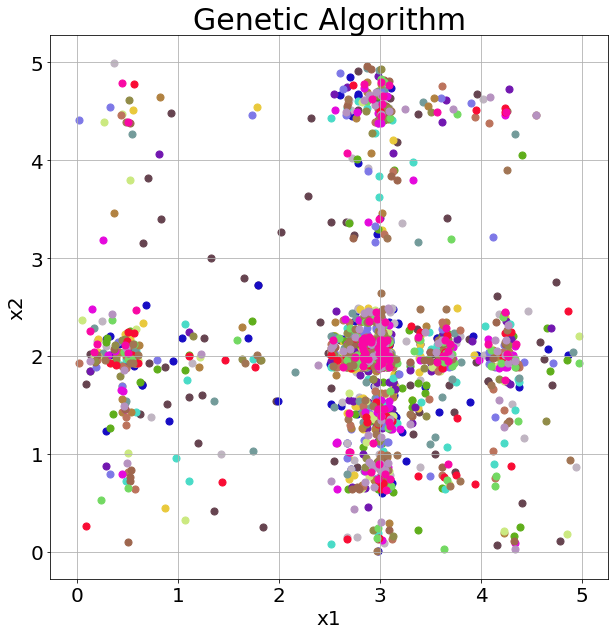

In [1]:
## This code is developed by Sreemannarayana Ikkurthi
## As a part of course notes for the course 15AES477: Multidisciplinary Design Optimization (MDO) 
## In support of Dr. Rajesh Senthil Kumar T., Assistant Professor 
## Department of Aerospace Engneering, Amrita Vishwa Vidyapeetham

################################################### LIBRARIES #############################################################
import random
import matplotlib.pyplot as plt
###########################################################################################################################

################################################### FUNCTIONS #############################################################
## INITIATE POPULATION
def ini_pop(no_bit, no_var, npop):
    def bin_var(no_bit, no_var):
        def rand_bin(no_bit):
            stg = [random.randint(0, 1) for i in range(no_bit)]
            return stg
        var = [rand_bin(no_bit) for j in range(no_var)]
        return var
    pop = [bin_var(no_bit, no_var) for i in range(npop)]
    return pop

## CONVERT BINARY POPULATION TO NORMALIZED POPULATION
def norm_pop(co_pop, lim):
    def norm_var(x, lim):
        def decode(x):
            vals = [(2**(len(x)-(i+1)))*(x[i]) for i in range(len(x))]
            de_val = sum(vals)
            return de_val
        norm_var = lim[0] + (((lim[1] - lim[0])*decode(x))/((2**len(x))-1))
        return norm_var
    nor_pop = [[norm_var(co_pop[i][j], lim) for j in range(len(co_pop[i]))] for i in range(len(co_pop))]
    return nor_pop
    
## REPRODUCTION FUNCTION TO GET MATING POOL
def rep_pop(co_pop, lim):
    nor_pop = norm_pop(co_pop, lim)
    f = [fun(nor_pop[i]) for i in range(len(co_pop))]
    def r_sel(f):
        def C(f):
            def B(f):
                def A(f):
                    def fit_fun(f):
                        fit_li = [1/(1+i) for i in f]
                        return fit_li
                    fit_li = fit_fun(f)
                    a = [fit/(sum(fit_li)/len(fit_li)) for fit in fit_li]
                    return a
                a = A(f)
                b = [i/len(a) for i in a]
                return b
            b = B(f)
            c = [sum(b[:i+1]) for i in range(len(b))]
            return c

        def D(npop):
            d = [random.random() for i in range(npop)]
            return d

        def close_ind(lst, n):
            ind = [(i + 1) for i in range(len(lst)) if lst[i] <= n <= lst[i+1]]
            if ind == []:
                ind = [0]
            return ind[0]
        c = C(f)
        d = D(len(f))
        r_index = [close_ind(c, d[i]) for i in range(len(d))]
        return r_index
    r_index = r_sel(f)
    mat_pool = [co_pop[i] for i in r_index]
    return mat_pool    

## CROSS OVER FUNCTION TO GET INTERMEDIATE POOL
def crov_pop(mat_pool, cp):
    indices = [i for i in range(len(mat_pool))]
    def comb_str(cod_var):
        comb_stg = []
        for i in range(len(cod_var)):
            comb_stg += cod_var[i]
        return comb_stg
    def sep_str(stg, no_stgs):
        sep_stg = [stg[i*int(len(stg)/no_stgs):(i+1)*int(len(stg)/no_stgs)] for i in range(no_stgs)]
        return sep_stg
    int_pool = ['']*len(mat_pool)   
    while indices != []:
        i1 = random.choice(indices)
        indices.remove(i1)
        i2 = random.choice(indices)
        indices.remove(i2)
        if random.choices([0, 1], weights = [1-cp, cp]) == [1]:
            cstg1 = comb_str(mat_pool[i1])
            cstg2 = comb_str(mat_pool[i2])
            c_point = random.choice([0, len(cstg1)-1])
            int_pool[i1] = cstg1[:c_point] + cstg2[c_point:]
            int_pool[i1] = sep_str(int_pool[i1], len(mat_pool[0]))
            int_pool[i2] = cstg2[:c_point] + cstg1[c_point:]
            int_pool[i2] = sep_str(int_pool[i2], len(mat_pool[0]))
        else:
            int_pool[i1] = mat_pool[i1]
            int_pool[i2] = mat_pool[i2]
    return int_pool

## MUTATION FUNCTION TO GET MUTATED POOL
def mut_pop(int_pop, mp):
    def inv_var_s(varias, mp):
        def inv_var(var, mp):
            def inv_bit(bit, mp):
                if random.choices([0, 1], weights = [1-mp, mp]) == [1]:
                    if bit == 1:
                        bit = 0
                    else:
                        bit = 1
                return bit
            var = [inv_bit(i, mp) for i in var]
            return var
        varias = [inv_var(i, mp) for i in varias]
        return varias
    mut_pool = [inv_var_s(i, mp) for i in int_pop]
    return mut_pool
###########################################################################################################################

################################################# INPUT ARENA #############################################################
no_var = 2            ## No. of variables
no_bit = 10           ## No. of bits per variable
npop = 100            ## Population size
n_gen = 20            ## No. of generations
var_lim = [0, 5]      ## Limits of variables

def fun(x):           ## Define the objective function here
    f = ((x[0]**2)+x[1]-11)**2+(x[0]+(x[1]**2)-7)**2
    return f
###########################################################################################################################

############################################### GENETIC ALGORITHM #########################################################
# Plot initiation
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(n_gen)]
plt.figure(figsize=(10,10))

mini_pool = []
co_pop = ini_pop(no_bit, no_var, npop)          ## INITIALIZING POPULATION
for i in range(n_gen):
    mat_pool = rep_pop(co_pop, var_lim)         ## GET MATING POOL
    inter_pool = crov_pop(mat_pool, 0.8)        ## GET INTERMEDIATE POOL
    mutated_pool = mut_pop(inter_pool, 0.1)     ## GET MUTATED POOL
    norm_pool = norm_pop(mutated_pool, var_lim) ## NORMALIZING MUTATED POOL

    # PLotting each generation
    ac_v1 = [norm_pool[i][0] for i in range(len(norm_pool))]
    ac_v2 = [norm_pool[i][1] for i in range(len(norm_pool))]
    plt.scatter(ac_v1, ac_v2, label = f'Generation {i}', color = color[i], marker = '.', s = 200)
    
    f = [fun(i) for i in norm_pool]      ## FUNCTION VALUE OF MUTATED POPULATION
    min_ind = f.index(min(f))            ## TO FIND MINIMUM FUNCTION AND SAVE ITS INDEX
    mini_pool.append(norm_pool[min_ind]) ## ADDING THE INDEX TO A LIST
    co_pop = mutated_pool                ## TO REPEAT THE PROCESS

min_f = [fun(i) for i in mini_pool]
min_ind = min_f.index(min(min_f))    
print(f'Minimum point: {mini_pool[min_ind]}')
print(f'Function Value: {fun(mini_pool[min_ind])}')

## Labeling the plot    
plt.grid()
plt.xlabel('x1', size = '20')
plt.ylabel('x2', size = '20')
plt.xticks(fontsize = '20')
plt.yticks(fontsize = '20')
plt.title('Genetic Algorithm', size = '30')
plt.show()
###########################################################################################################################
